<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Image Datasets and Transforms</h1> 


<h2>Objective</h2><ul><li> How to build a image dataset object.</li><li> How to perform pre-build transforms from Torchvision Transforms to the dataset. .</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will build a dataset objects for images; many of the processes can be applied to a larger dataset. Then you will apply pre-build transforms from Torchvision Transforms to that dataset.</p>
<ul>
    <li><a href="https://#auxiliary"> Auxiliary Functions </a></li>
    <li><a href="https://#Dataset"> Datasets</a></li>
    <li><a href="https://#Torchvision">Torchvision Transforms</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


<h2>Preparation</h2>


Download the dataset and unzip the files in your data directory, **to download faster this dataset has only 100 samples**:


In [1]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P /resources/data


--2022-02-24 13:02:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/x-tar]
Saving to: ‘/resources/data/img.tar.gz’

img.tar.gz          100%[===================>]  49.28K   164KB/s    in 0.3s    

2022-02-24 13:02:53 (164 KB/s) - ‘/resources/data/img.tar.gz’ saved [50460/50460]



In [2]:
#Extract images

!tar -xf /resources/data/img.tar.gz 

In [3]:
#Extract csv file
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2022-02-24 13:02:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M   425KB/s    in 3.9s    

2022-02-24 13:03:00 (425 KB/s) - ‘index.csv’ saved [1680905/1680905]



We will use this function in the lab:


In [4]:
#Function to print image data
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

The following are the libraries we are going to use for this lab. The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.


In [5]:
# These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [6]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

<!--Empty Space for separating topics-->


<h2 id="auxiliary">Auxiliary Functions</h2>


You will use the following function as components of a dataset object, in this section, you will review each of the components independently.


The path to the csv file with the labels for each image.


In [7]:
# Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

You can load the CSV file and convert it into a dataframe , using the Pandas function <code>read_csv()</code> . You can view the dataframe using the method head.


In [8]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


The first column of the dataframe corresponds to the type of clothing. The second column is the name of the image file corresponding to the clothing. You can obtain the path of the first file by using the method  <code> <i>DATAFRAME</i>.iloc\[0, 1]</code>. The first argument corresponds to the sample number, and the second input corresponds to the column index.


In [9]:
# Get the value on location row 0, column 1 (Notice that index starts at 0)
#rember this dataset has only 100 samples to make the download faster  
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


As the class of the sample is in the first column, you can also obtain the class value as follows.


In [10]:
# Get the value on location row 0, column 0 (Notice that index starts at 0.)

print('y:', data_name.iloc[0, 0])

y: Ankle boot


Similarly, You can obtain the file name of the second image file and class type:


In [11]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


The number of samples corresponds to the number of rows in a dataframe. You can obtain the number of rows using the following lines of code. This will correspond the data attribute <code>len</code>.


In [12]:
# Print out the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


<h2 id="load_image">Load Image</h2>


To load the image, you need the directory and the image name. You can concatenate the variable <code>train_data_dir</code> with the name of the image stored in a Dataframe. Finally, you will store the result in the variable <code>image_name</code>


In [13]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1]
image_name

'img/fashion1.png'

we can find the image path:


In [14]:
image_path=os.path.join(directory,image_name)
image_path

'img/fashion1.png'

You can then use the function <code>Image.open</code> to store the image to the variable <code>image</code> and display the image and class .


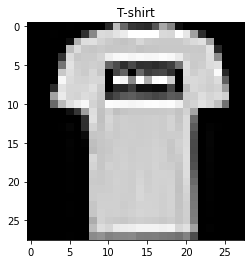

In [15]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

You can repeat the process for the 20th image.


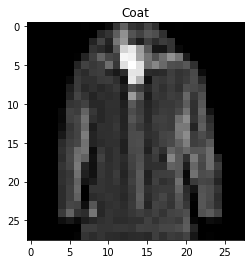

In [16]:
# Plot the 20th image

image_name = data_name.iloc[19, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[19, 0])
plt.show()

<hr>


Create the dataset object.


<h2 id="data_class">Create a Dataset Class</h2>


In this section, we will use the components in the last section to build a dataset class and then create an object.


In [17]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [18]:
# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)

Each sample of the image and the class y is stored in a tuple <code> dataset\[sample]</code> . The image is the first element in the tuple <code> dataset\[sample]\[0]</code> the label or class is the second element in the tuple <code> dataset\[sample]\[1]</code>. For example you can plot the first image and class.


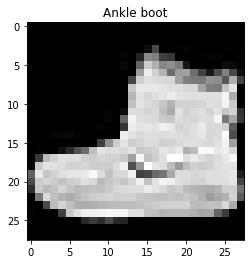

In [19]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [20]:
np.shape(dataset[0])

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:102: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order)


(2,)

Similarly, you can plot the second image:


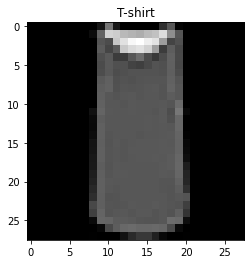

In [21]:
image=dataset[2][0]
y=dataset[2][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

<h2 id="Torchvision"> Torchvision Transforms  </h2>


You will focus on the following libraries:


In [22]:
import torchvision.transforms as transforms

We can apply some image transform functions on the dataset object. The iamge can be cropped and converted to a tensor. We can use <code>transform.Compose</code> we learned from the previous lab to combine the two transform functions.


In [23]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)


The shape of the first element tensor:  torch.Size([1, 20, 20])


We can see the image is now 20 x 20


<!--Empty Space for separating topics-->


Let us plot the first image again. Notice we see less of the shoe.


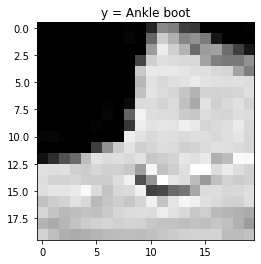

In [24]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

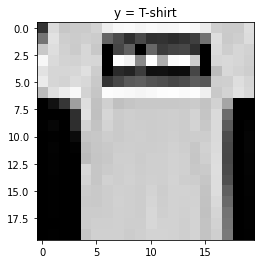

In [25]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

In the below example, we Vertically flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


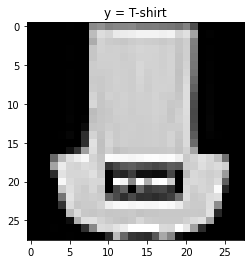

In [26]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

<!--Empty Space for separating topics-->


<h3>Practice</h3>


Try to use the <code>RandomVerticalFlip</code> (vertically flip the image) with horizontally flip and convert to tensor as a compose. Apply the compose on image. Use <code>show_data()</code> to plot the second image (the image as <b>2</b>).


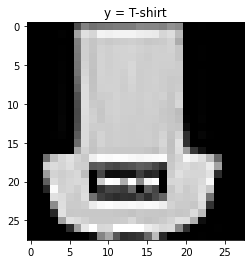

In [27]:
# Practice: Combine vertical flip, horizontal flip and convert to tensor as a compose. Apply the compose on image. Then plot the image


VerticalHorizontalTransform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.RandomHorizontalFlip(p=1),transforms.ToTensor()]);

twoFlips_Data = Dataset(csv_file = csv_file,data_dir=directory,transform=VerticalHorizontalTransform);

show_data(twoFlips_Data[1])

# Type your code here

Double-click **here** for the solution.

<!-- 
my_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])
 -->


<a href="https://dataplatform.cloud.ibm.com/registration/stepone?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2021-01-01&context=cpdaas&apps=data_science_experience%2Cwatson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"/></a>


<!--Empty Space for separating topics-->


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2021-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork20647811-2021-01-01">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-21        | 2.0     | Shubham    | Migrated Lab to Markdown and added to course repo in GitLab |


<hr>


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
